In [1]:
import numpy as np

from qiskit import QuantumCircuit, Aer, execute
# from qiskit import *

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.rz(np.pi/2, 1)

backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j    0.   +0.j    0.   +0.j    0.   +0.707j]


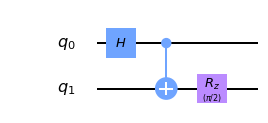

In [2]:
circ.draw(output='mpl')

In [3]:
J=circ

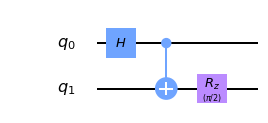

In [4]:
J.draw(output='mpl')

In [14]:
J_4 = QuantumCircuit(4)
J_4.h(0)
J_4.cx(0,1)
J_4.cx(0,2)
J_4.cx(0,3)
J_4.rz(np.pi/2, 3)

backend = Aer.get_backend('statevector_simulator')
job = execute(J_4, backend)
result = job.result()
outputstate = result.get_statevector(J_4, decimals=3)
print(outputstate)

[0.707+0.j    0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.707j]


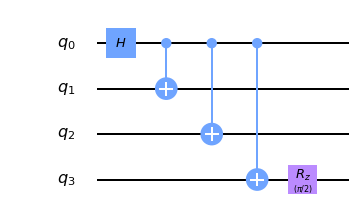

In [12]:
J_4.draw(output='mpl')

In [53]:
import math
a = (1/math.sqrt(2))*math.cos(math.pi/16)*(id+0.j*X)+(1/sqrt(2))*math.sin(pi/16)*(i*y-i*z)

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'complex'

In [52]:
# computing optimal quantum strategy in unitary matrix form

# defining pauli operators
I = np.matrix('1 0; 0 1')
X = np.matrix('0 1; 1 0')
Y = np.matrix('0 -1j; 1j 0')
Z = np.matrix('1 0; -1 0')




In [56]:


print(math.sqrt(4)) 

2.0


In [59]:
import math
a = (1/math.sqrt(2))*math.cos(math.pi/16)*(I+X)+(1/math.sqrt(2))*math.sin(math.pi/16)*(Y-Z)
print (a)

[[0.55557023+0.j         0.69351992-0.13794969j]
 [0.83146961+0.13794969j 0.69351992+0.j        ]]


In [ ]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
print(np.around(result.get_unitary(circ), 3))